<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2443 non-null   object 
 1   Date        2443 non-null   object 
 2   PM2.5       2443 non-null   float64
 3   PM10        2443 non-null   float64
 4   NO          2443 non-null   float64
 5   NO2         2443 non-null   float64
 6   NOx         2443 non-null   float64
 7   NH3         2443 non-null   float64
 8   CO          2443 non-null   float64
 9   SO2         2443 non-null   float64
 10  O3          2443 non-null   float64
 11  Benzene     2443 non-null   float64
 12  Toluene     2443 non-null   float64
 13  AQI         2443 non-null   float64
 14  AQI_Bucket  2443 non-null   object 
dtypes: float64(12), object(3)
memory usage: 286.4+ KB


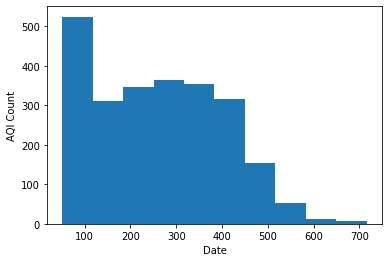

In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

path = "ddataset_smoted_3i_5k.csv"
df = pd.read_csv(path)
#to describe the dataframe
df.describe()
# to determine shape of dataframe
df.shape
#extra info about the dataset
df.info()
#to check null values in dataset
df.isnull()
df.isnull().sum()

plt.hist(df["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI Count")
plt.show()




In [2]:
X=df.iloc[:, 1:-2] #except last 2 columns
y=df.iloc[:, 13:14] #only 13th column


In [3]:
y

,AQI
0,454.000000
1,143.000000
2,319.000000
3,325.000000
4,318.000000
...,...
2438,494.765550
2439,412.590191
2440,487.363027
2441,486.283730


splitting of dataset

In [4]:
df_x, df_x1, df_y, df_y1= train_test_split(X,y,test_size=0.3, random_state=42)
#df.drop(["City"], axis=1, inplace=True)
df_x["Date"] = pd.to_datetime(df_x["Date"]) #convert object to workable datatype acc to panda [datetime]
df_x1["Date"] = pd.to_datetime(df_x["Date"])
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])
X_train = df_x.drop(['Date'], axis = 1) #axis=1 means removing column
y_train = df_y["AQI"]
X_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train) #use fit_transform for train and transform for test
X_test=sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1)) #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [6]:
df.head() #first 5 rows
rf=RandomForestRegressor(n_estimators = 1000, random_state = 42) #n_estimators->the number of trees you want to build before taking the maximum voting or averages of predictions.
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_test

array([[-5.49110185e-01],
       [-1.19143735e+00],
       [ 8.59630071e-01],
       [-7.75384527e-01],
       [-1.19873652e+00],
       [ 1.03055951e+00],
       [ 1.67542608e+00],
       [-3.08237499e-01],
       [-1.24234624e+00],
       [ 1.95405390e-01],
       [-1.06005225e+00],
       [-1.30595311e+00],
       [-1.24983073e+00],
       [-3.00938327e-01],
       [ 1.44311184e-01],
       [ 1.26445368e+00],
       [ 6.47954074e-01],
       [-4.32323428e-01],
       [ 9.61818483e-01],
       [ 1.37012012e-01],
       [ 1.73507874e-01],
       [ 1.74704483e+00],
       [ 2.42165295e+00],
       [-1.26111201e+00],
       [-1.21333487e+00],
       [-9.79761352e-01],
       [-1.23915553e+00],
       [-3.95827567e-01],
       [ 1.06961902e+00],
       [-8.55675422e-01],
       [ 3.63286354e-01],
       [ 1.72093240e+00],
       [-2.35245776e-01],
       [ 1.22295856e+00],
       [-5.27664681e-02],
       [-1.42068344e+00],
       [-1.47655708e-01],
       [ 3.70585526e-01],
       [-1.1

calculating metrics


In [7]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_pred)
mean_error = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)

R2 SCORE is 0.9473188539942514
mean_sqrd_error is  0.05011053948134832
Root mean squared error of is 0.22385383508295836
Mean Absolute error is 0.15271540671969425
Accuracy is 0.8472845932803057


In [8]:
y_test.reshape(-1,1) #specifies the new shape of the array w/o changing data inside
y_test

array([[-5.49110185e-01],
       [-1.19143735e+00],
       [ 8.59630071e-01],
       [-7.75384527e-01],
       [-1.19873652e+00],
       [ 1.03055951e+00],
       [ 1.67542608e+00],
       [-3.08237499e-01],
       [-1.24234624e+00],
       [ 1.95405390e-01],
       [-1.06005225e+00],
       [-1.30595311e+00],
       [-1.24983073e+00],
       [-3.00938327e-01],
       [ 1.44311184e-01],
       [ 1.26445368e+00],
       [ 6.47954074e-01],
       [-4.32323428e-01],
       [ 9.61818483e-01],
       [ 1.37012012e-01],
       [ 1.73507874e-01],
       [ 1.74704483e+00],
       [ 2.42165295e+00],
       [-1.26111201e+00],
       [-1.21333487e+00],
       [-9.79761352e-01],
       [-1.23915553e+00],
       [-3.95827567e-01],
       [ 1.06961902e+00],
       [-8.55675422e-01],
       [ 3.63286354e-01],
       [ 1.72093240e+00],
       [-2.35245776e-01],
       [ 1.22295856e+00],
       [-5.27664681e-02],
       [-1.42068344e+00],
       [-1.47655708e-01],
       [ 3.70585526e-01],
       [-1.1

In [9]:
y_pred.reshape(-1,1)

array([[-4.46140761e-01],
       [-1.18200233e+00],
       [ 1.16514632e+00],
       [-4.00272763e-01],
       [-9.24707835e-01],
       [ 1.07612742e+00],
       [ 1.69222251e+00],
       [-4.43812325e-01],
       [-1.19604422e+00],
       [-1.11889764e-01],
       [-1.01490843e+00],
       [-1.31717967e+00],
       [-1.25699340e+00],
       [-1.72669972e-01],
       [ 5.13056593e-01],
       [ 1.25079023e+00],
       [ 8.55636034e-01],
       [-2.82902072e-01],
       [ 1.13900761e+00],
       [-2.18282499e-01],
       [ 4.62668602e-01],
       [ 1.67194723e+00],
       [ 2.03035675e+00],
       [-1.27152118e+00],
       [-1.21174664e+00],
       [-7.06874496e-01],
       [-1.23008557e+00],
       [-2.15516113e-01],
       [ 1.02841209e+00],
       [-8.54850616e-01],
       [ 3.57301032e-01],
       [ 1.82975828e+00],
       [-8.51893915e-02],
       [ 1.94395838e+00],
       [-1.70830580e-01],
       [-1.45333044e+00],
       [ 1.53421087e-02],
       [-1.62555979e-01],
       [-1.0

plotting graphs

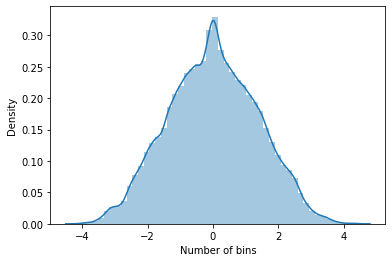

In [10]:
predictions = rf.predict(X_test)
fig = sns.distplot(y_test-predictions) #using the seaborn library we create an histogram of predicted values
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig) 

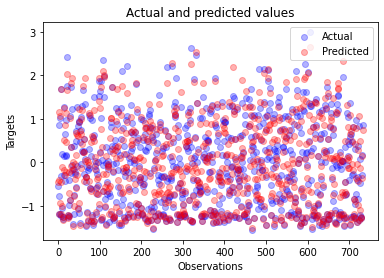

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend()
plt.show()

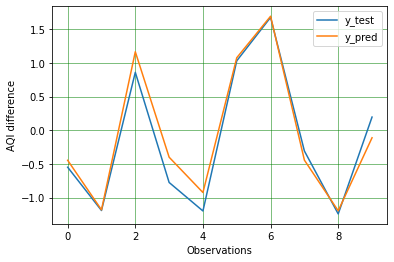

In [12]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(y_pred.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()

In [13]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_pred
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,-0.549110,-0.446141,-0.102969,Accurate,-18.752051
1,-1.191437,-1.182002,-0.009435,Accurate,-0.791902
2,0.859630,1.165146,-0.305516,Accurate,35.540433
3,-0.775385,-0.400273,-0.375112,Accurate,-48.377515
4,-1.198737,-0.924708,-0.274029,Accurate,-22.859793
5,1.030560,1.076127,-0.045568,Accurate,4.421666
6,1.675426,1.692223,-0.016796,Accurate,1.002517
7,-0.308237,-0.443812,0.135575,Accurate,-43.983885
8,-1.242346,-1.196044,-0.046302,Accurate,-3.726982
9,0.195405,-0.111890,0.307295,Accurate,157.260326
